In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Citation 
# https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python
# https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression

In [3]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Split train and test data
X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

In [5]:
# Create Data Frame
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)

# show data
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_data.shape

(506, 13)

In [7]:
# Standrize data
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Coefficients: 
 [-1.31193031  0.86187745 -0.16719287  0.18957843 -1.48658584  2.79131565
 -0.32737703 -2.77204093  2.97567549 -2.2727549  -2.13375869  1.05842993
 -3.33495407]
Mean squared error: 28.53
Variance score: 0.70


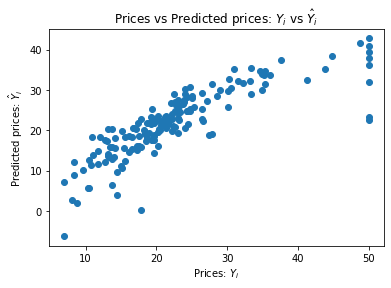

In [9]:
# Implement Linear Regression
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
# print("R^2 score: %.2f"  % lm.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

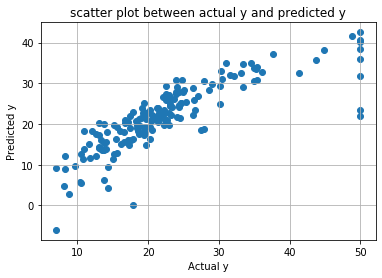

Mean Squared Error : 28.545951396225185
Mean Absolute Error : 3.450685306695088


In [10]:
# First implement SKLearn SGD
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X_train, Y_train)

plt.scatter(Y_test,clf_.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, clf_.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, clf_.predict(X_test)))

In [11]:
# SkLearn SGD classifier predicted weight matrix
sklearn_w=clf_.coef_
sklearn_w

array([-1.19998397,  0.70823758, -0.47154859,  0.24990282, -1.25091027,
        2.89665502, -0.38369813, -2.64985472,  1.78730939, -1.05960085,
       -2.08913235,  1.03175028, -3.31171865])

In [12]:
# Implement Custom SGD
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
boston_data = ((boston_data - boston_data.mean())/boston_data.std())

boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [14]:
boston_data["PRICE"] = boston.target

boston_data.head()
# X = boston_data
# Y = boston.target

# print(X.shape)
# print(Y.shape)

# X.head()
# Y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [15]:
Y = boston_data['PRICE']
X = boston_data.drop('PRICE', axis=1)

print(X.shape)
print(Y.shape)

print(X.head())
print("*"*100)
print(Y.head())

(506, 13)
(506,)
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  
****************************************************************************************************
0    24.0
1    21.6
2    34.7
3    33.4
4    36

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [17]:
x_train["PRICE"] = y_train

In [18]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        #error = (y-ypred)^2
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [19]:
def absolute_cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        #error = (y-ypred)
        totalError += (y[:,i] - (np.dot(x[i] , m) + b))
    return totalError / len(x)

In [20]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, m, features, target):
    for i in range(0, len(features)):
        x = features
        y = target
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        # sum((y-(mx+b)))^2
        ss_res = sum(((y[:,i]) - (np.dot(x[i], m) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [21]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate):
    n_iter = 500
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(160)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        # Test sample
        #x_test["PRICE"] = [y_test]
        #test_data = x_test
        #test_sample = test_data.sample()
        #y_test = np.asmatrix(test_sample["PRICE"])
        #x_test = np.asmatrix(test_sample.drop("PRICE", axis = 1))
        
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[-0.41144214]
 [-1.32743691]
 [-1.6211677 ]
 [ 1.4974427 ]
 [ 0.34429883]
 [ 4.27231502]
 [-0.16421896]
 [-1.517363  ]
 [ 1.05404979]
 [-0.82986638]
 [ 0.22719132]
 [-0.03506302]
 [-3.44585941]] 
 y_intercept: [[21.27676176]]


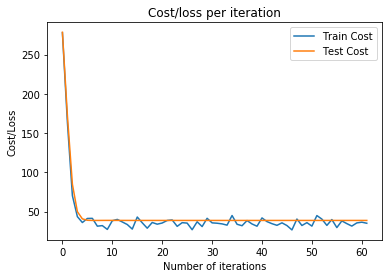

In [22]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

'''
error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error:",error)
'''

plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

#error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
#print("Mean squared error: %.2f" % error)

# Compare Custom SGD with Sklearn SGD

In [23]:
# Sklearn SGD
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(Y_test, Y_pred))
# The mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(Y_test, Y_pred))

Mean squared error: 28.53
Variance score: 0.70
Mean Absolute Error: 3.46


In [24]:
# Implemented SGD
# The mean squared error
error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error: %.2f" % (error))
# Explained variance score : 1 is perfect prediction
r_squared = r_sq_score(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Variance score: %.2f" % r_squared)
absolute_error = absolute_cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean Absolute Error: %.2f" % absolute_error)

Mean squared error: 38.63
Variance score: 0.36
Mean Absolute Error: 1.77


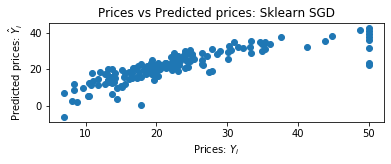

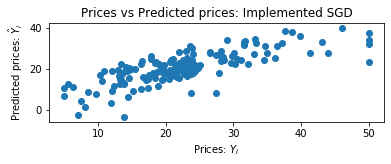

In [25]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

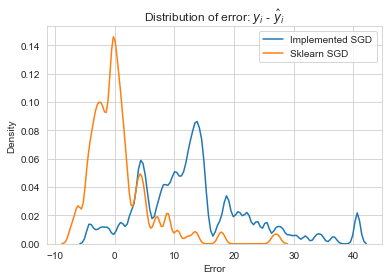

In [26]:
# Distribution of error
delta_y_im = np.asmatrix(y_test) - (np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)
delta_y_sk = Y_test - Y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.asarray(delta_y_im)[0], label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

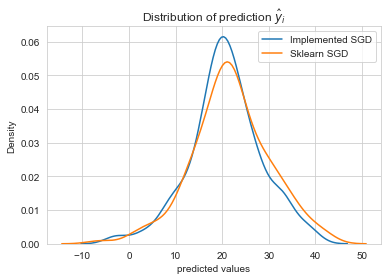

In [27]:
# Distribution of predicted value
sns.set_style('whitegrid')
sns.kdeplot(np.array(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b).T[0], label = "Implemented SGD")
sns.kdeplot(Y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

In [28]:
from prettytable import PrettyTable
# MSE = mean squared error
# MAE =mean absolute error
x=PrettyTable()#np.asmatrix(x_test), 
x.field_names=['Model','Weight Vector','MSE','MAE', 'Variance Score']
x.add_row(['sklearn',sklearn_w,mean_squared_error(Y_test, clf_.predict(X_test)),mean_absolute_error(Y_test, clf_.predict(X_test)),r2_score(Y_test, Y_pred)])
x.add_row(['custom',optimal_w,error,absolute_error,r_squared])
print(x)

+---------+--------------------------------------------------------------------------+--------------------+-------------------+--------------------+
|  Model  |                              Weight Vector                               |        MSE         |        MAE        |   Variance Score   |
+---------+--------------------------------------------------------------------------+--------------------+-------------------+--------------------+
| sklearn | [-1.19998397  0.70823758 -0.47154859  0.24990282 -1.25091027  2.89665502 | 28.545951396225185 | 3.450685306695088 | 0.6956551656111603 |
|         |  -0.38369813 -2.64985472  1.78730939 -1.05960085 -2.08913235  1.03175028 |                    |                   |                    |
|         |                               -3.31171865]                               |                    |                   |                    |
|  custom |                              [[-0.41144214]                              |  [[38.62996824]]   

In [29]:
sklearn_pred=clf_.predict(x_test)
implemented_pred=(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)
x=PrettyTable()
x.field_names=['SKLearn SGD predicted value','Implemented SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr],implemented_pred[itr]])
print(x)  

+-----------------------------+---------------------------------+
| SKLearn SGD predicted value | Implemented SGD predicted value |
+-----------------------------+---------------------------------+
|      11.010976872064473     |          [[9.34267897]]         |
|      28.13265575430431      |         [[21.81915391]]         |
|      32.610429206840855     |         [[27.97043084]]         |
|      19.47265691695546      |         [[22.43740506]]         |
|      26.99547481859689      |         [[20.51530473]]         |
|      18.17885314254281      |         [[15.23322088]]         |
|      6.450183867637406      |         [[10.74021524]]         |
|      25.429866825378358     |         [[23.82642385]]         |
|      21.60484164577307      |         [[19.48934147]]         |
|      24.084364627932437     |         [[21.50028139]]         |
|      6.151923708168887      |          [[7.03308681]]         |
|      27.77673286644099      |         [[21.02386188]]         |
|      10.